In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import warnings
warnings.filterwarnings('ignore')


In [44]:
data = pd.read_csv('Water_Count.csv')
data = data.iloc[10:]
data['Date'] = data['Date'].str.strip()
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')

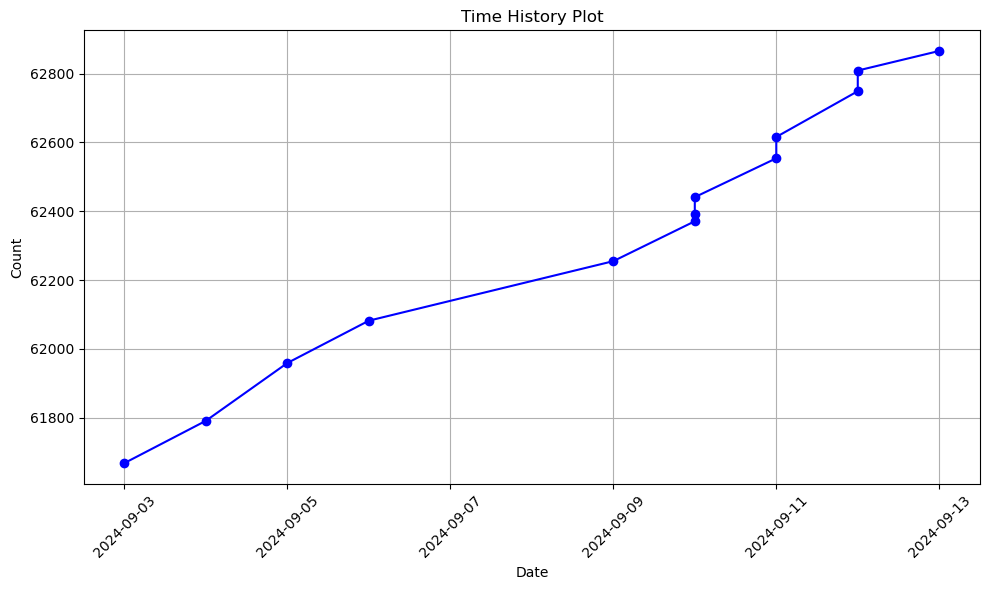

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Count'], marker='o', linestyle='-', color='b')
plt.title('Time History Plot')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [46]:
target = 69420
current = data['Count'].iloc[-1]

avg_per_day = (data['Count'].iloc[-1] - data['Count'].iloc[0])/(data['Date'].iloc[-1] - data['Date'].iloc[0]).days
days_simple = math.floor((target - current) / avg_per_day)
predicted_day_simple = (data['Date'].iloc[-1] + datetime.timedelta(days=days_simple)).strftime("%m/%d/%Y")
print(f'Current Predicted Day of 69420 is: {predicted_day_simple}')


Current Predicted Day of 69420 is: 11/06/2024


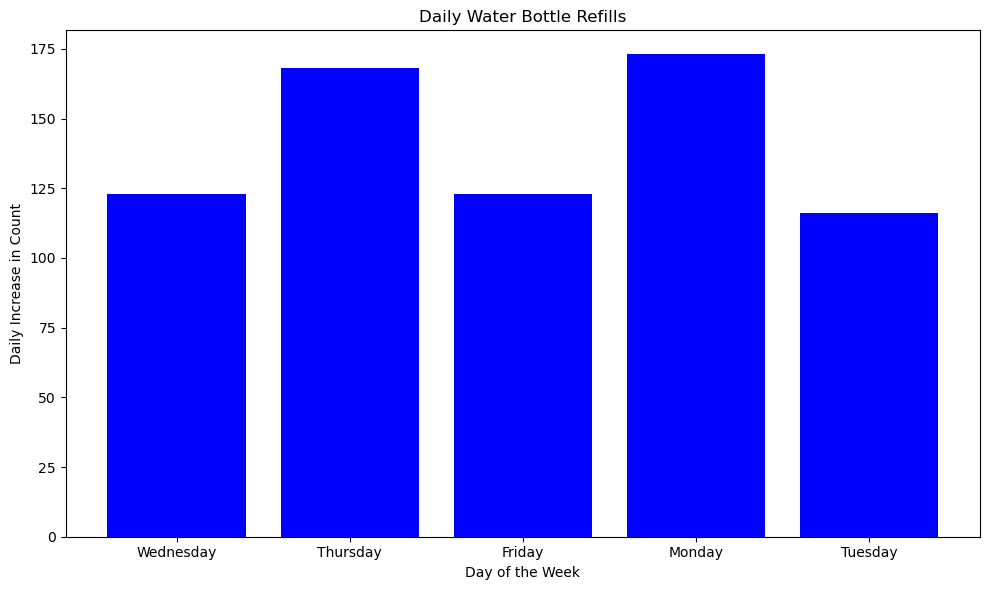

In [47]:
data['Daily_Increase'] = data['Count'].diff()
data_daily = data.dropna(subset=['Daily_Increase'])
data_daily['Day_of_Week'] = data_daily['Date'].dt.day_name()

plt.figure(figsize=(10, 6))
plt.bar(data_daily['Day_of_Week'], data_daily['Daily_Increase'], color='blue')
plt.title('Daily Water Bottle Refills')
plt.xlabel('Day of the Week')
plt.ylabel('Daily Increase in Count')
plt.tight_layout()

plt.show()

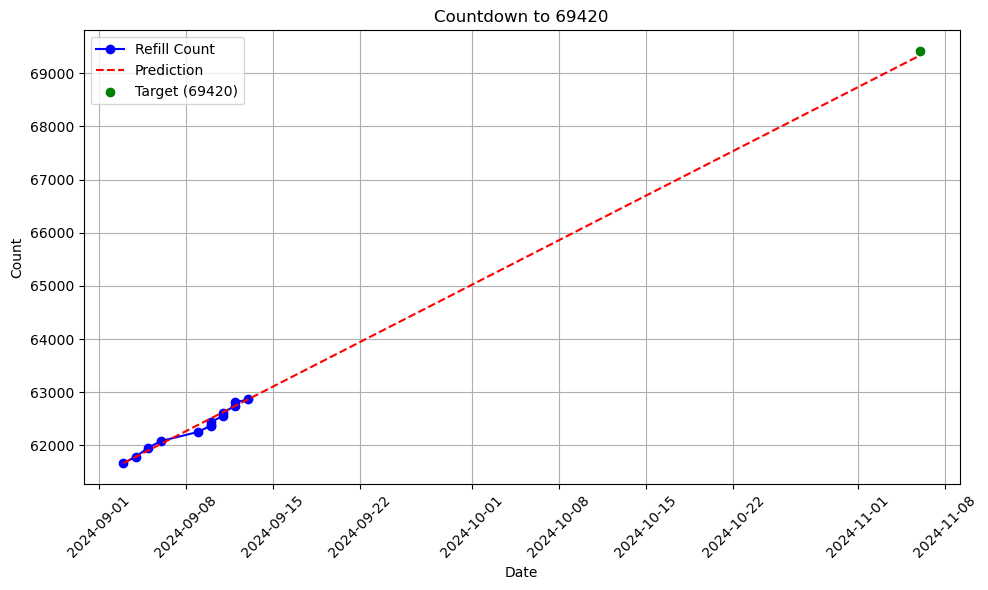

In [48]:
plt.figure(figsize=(10, 6))

plt.plot(data['Date'], data['Count'], marker='o', linestyle='-', color='b', label='Refill Count')

target_date = pd.to_datetime(predicted_day_simple, format='%m/%d/%Y')
dates_extended = pd.date_range(start=data['Date'].iloc[0], end=target_date)

count_slope_line = data['Count'].iloc[0] + avg_per_day * (dates_extended - data['Date'].iloc[0]).days
plt.plot(dates_extended, count_slope_line, linestyle='--', color='r', label='Prediction')

plt.scatter([target_date], [target], color='green', zorder=5, label=f'Target ({target})')

plt.title('Countdown to 69420')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()